In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v = np.linspace(110, 190,100)

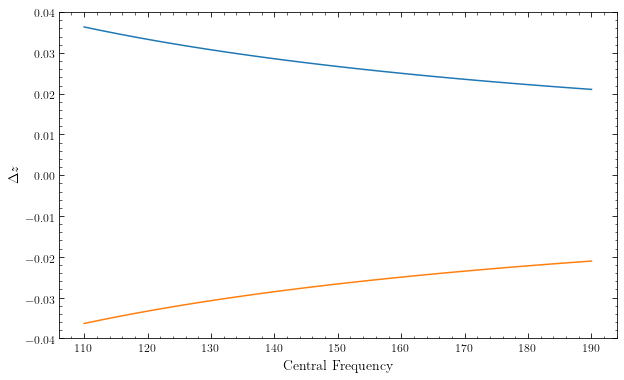

In [7]:
plt.figure(figsize=(10,6))
plt.plot(v, (v + 4) / v - 1)
plt.plot(v, (v - 4) / v - 1)
plt.xlabel('Central Frequency')
plt.ylabel(r'$\Delta z$')
plt.show()

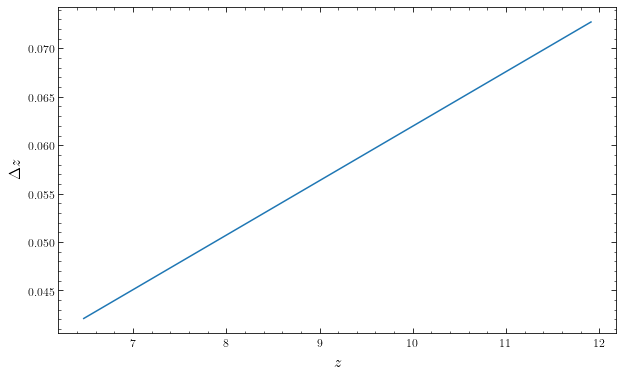

In [13]:
plt.figure(figsize=(10,6))
plt.plot(1420. / v - 1, (v + 4) / v - 1 - ((v - 4) / v - 1))
plt.xlabel('$z$', fontsize = 16)
plt.ylabel(r'$\Delta z$', fontsize = 16)
plt.show()